In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from IPython.display import display

drive.mount('/content/drive')
ruta_archivo = "/content/drive/My Drive/DataSets/diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(ruta_archivo)
display(df.head(10))
print("Columnas y tipos de datos:")
print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


Columnas y tipos de datos:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [ ]:
# Verificar si hay valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Normalización de variables numéricas para clustering
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])  # Escalamos todas excepto la primera columna

Valores nulos por columna:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


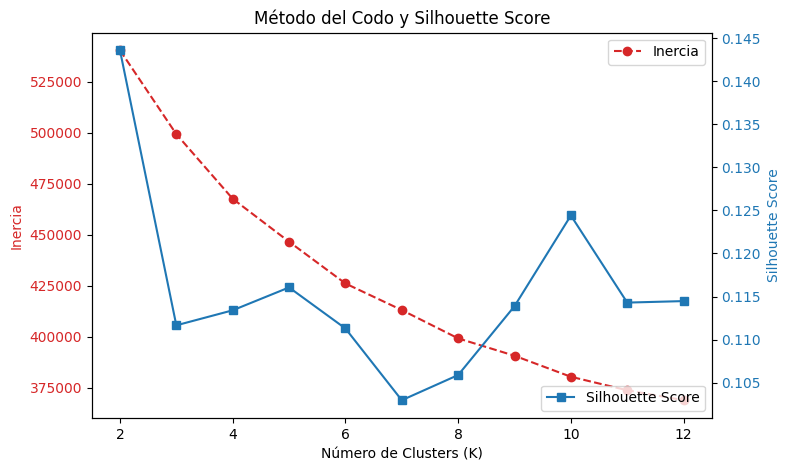

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Listas para almacenar los valores de inercia y silhouette
inercia = []
silhouette_scores = []

# Probar distintos valores de K (número de clusters)
for k in range(2, 13):  # Comenzamos en 2 porque silhouette no se define para k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inercia.append(kmeans.inertia_)

    # Calcular la puntuación de silhouette
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Crear gráfico de comparación
fig, ax1 = plt.subplots(figsize=(8, 5))

# Gráfica de inercia (codo)
color = 'tab:red'
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inercia', color=color)
ax1.plot(range(2, 13), inercia, marker='o', linestyle='--', color=color, label="Inercia")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper right")

# Crear un segundo eje Y para silhouette
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, 13), silhouette_scores, marker='s', linestyle='-', color=color, label="Silhouette Score")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="lower right")

plt.title('Método del Codo y Silhouette Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


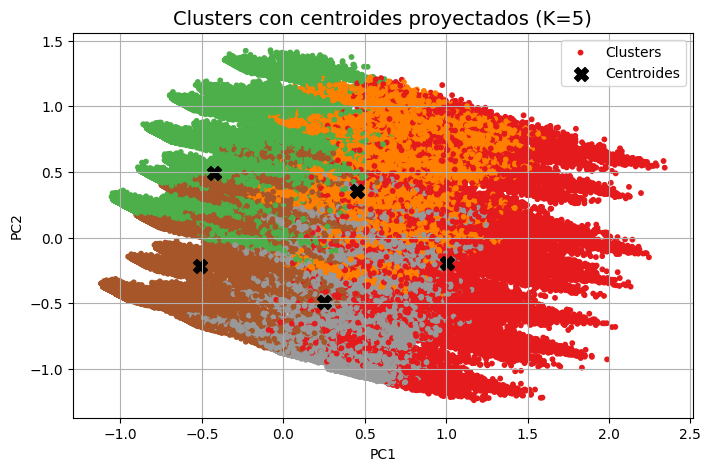

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar PCA para reducir el dataset a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Ejecutar K-Means con K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(df_scaled)

# Proyectar los centroides al mismo espacio PCA
centroides_pca = pca.transform(kmeans.cluster_centers_)

# Crear una sola figura con clusters y centroides
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='Set1', s=10, label="Clusters")
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='black', s=100, marker='X', label='Centroides')
plt.title("Clusters con centroides proyectados (K=5)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

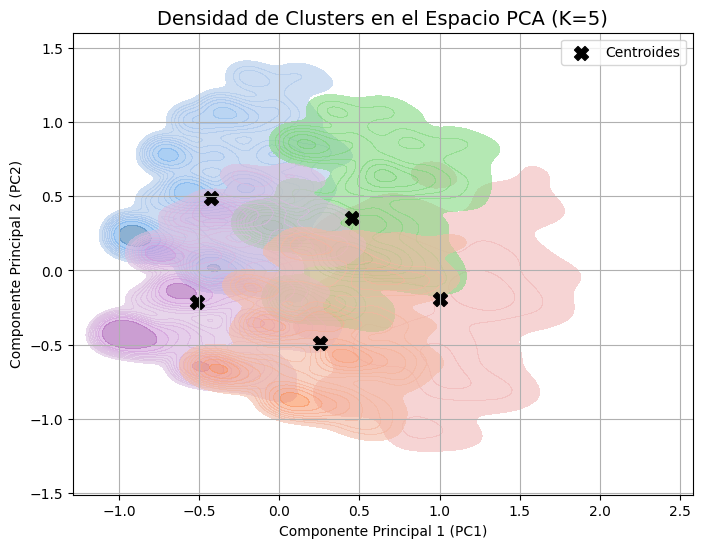

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las componentes principales y los clusters asignados
df_pca_cluster = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_cluster["Cluster"] = y_pred  # Asignar los clusters predichos

# Crear el gráfico de densidades
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_pca_cluster["PC1"], y=df_pca_cluster["PC2"], hue=df_pca_cluster["Cluster"], fill=True, alpha=0.6, palette="Set1")

# Agregar los centroides sobre el gráfico de densidad
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='black', s=100, marker='X', label="Centroides")

plt.title("Densidad de Clusters en el Espacio PCA (K=5)", fontsize=14)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend()
plt.grid(True)
plt.show()